In [ ]:
import torch
import torch.nn as nn
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler


In [ ]:

from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


classification on hybrid CSV

In [1]:
import torch
import torch.nn as nn
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler



In [2]:
file_path ='/content/drive/My Drive/8.hybrid_csvs_CrossDomain/celebDF_hybrid_fused_features.csv'
hybrid_df = pd.read_csv(file_path)

In [4]:
hybrid_df.head()

,fused_feat_0,fused_feat_1,fused_feat_2,fused_feat_3,fused_feat_4,fused_feat_5,fused_feat_6,fused_feat_7,fused_feat_8,fused_feat_9,...,fused_feat_54,fused_feat_55,fused_feat_56,fused_feat_57,fused_feat_58,fused_feat_59,fused_feat_60,fused_feat_61,image_path,label
0,0.003282,0.019841,0.043543,0.015060,0.020702,0.029520,0.032927,0.033058,0.062925,0.073915,...,2.078223,1.629999,1.463866,1.856160,2.456548,1.846630,1.897394,1.813486,000001_0,0
1,0.004668,0.025216,0.073658,0.030467,0.024497,0.035000,0.035896,0.018209,0.013392,0.031258,...,1.093856,1.095913,1.125274,0.692956,0.818839,0.770253,1.102970,1.002572,000002_0,0
2,0.003413,0.021175,0.044761,0.014436,0.020826,0.029836,0.034510,0.035242,0.066927,0.078625,...,1.968439,1.512162,1.496995,1.838386,2.425347,1.815329,1.860231,1.778570,000003_0,0
3,0.003218,0.021464,0.040750,0.014237,0.017859,0.023080,0.027580,0.032782,0.062850,0.076441,...,1.842461,1.444300,1.798886,2.102392,2.655701,2.129842,1.962431,1.968822,000004_0,0
4,0.003396,0.020668,0.044656,0.014517,0.017200,0.022122,0.027196,0.032399,0.064423,0.080566,...,1.794146,1.454879,1.797423,2.081382,2.633242,2.095650,1.941407,1.920200,000005_0,0


In [10]:
hybrid_df.shape

(181228, 64)

MLP classifier

In [5]:
# Preprocessing
X = hybrid_df.drop(columns=["image_path", "label"])
y = hybrid_df["label"]

X = X.dropna()
y = y.loc[X.index]

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, stratify=y, random_state=42
)


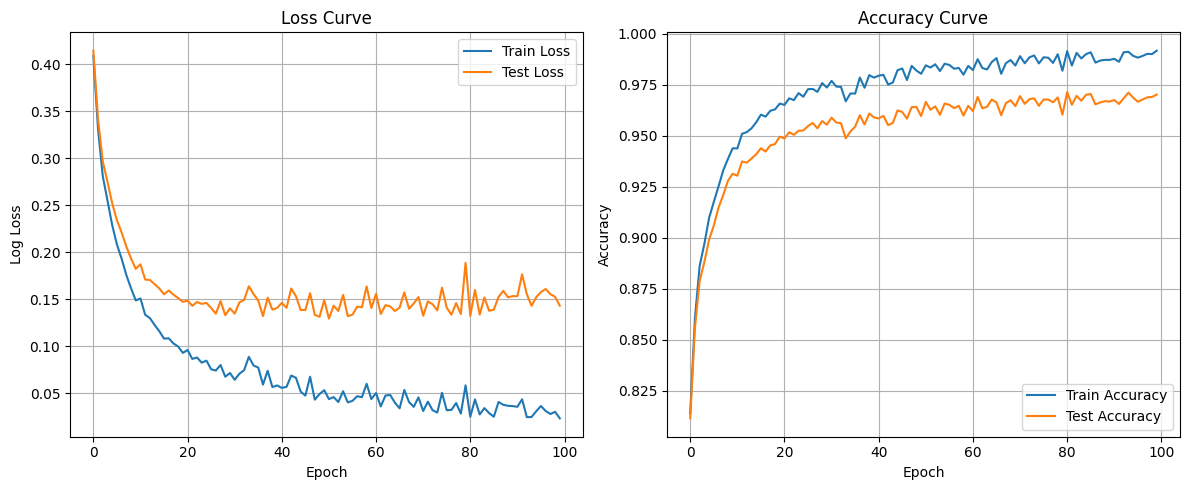

In [24]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import log_loss, accuracy_score
import matplotlib.pyplot as plt
import numpy as np

# Initialize model for manual training
mlp_model = MLPClassifier(
    hidden_layer_sizes=(256, 128, 64),
    activation='relu',
    solver='adam',
    alpha=1e-4,
    max_iter=1,              # One iteration per epoch
    warm_start=True,         # So training continues
    random_state=42
)

# Lists to track metrics
train_losses, test_losses = [], []
train_accuracies, test_accuracies = [],[]

# Get classes for partial_fit
classes = np.unique(y_train)

# Train for 100 epochs manually
for epoch in range(100):
    mlp_model.partial_fit(X_train, y_train, classes=classes)

    # Predictions
    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)

    y_train_proba = mlp_model.predict_proba(X_train)
    y_test_proba = mlp_model.predict_proba(X_test)

    # Metrics
    train_losses.append(log_loss(y_train, y_train_proba))
    test_losses.append(log_loss(y_test, y_test_proba))

    train_accuracies.append(accuracy_score(y_train, y_train_pred))
    test_accuracies.append(accuracy_score(y_test, y_test_pred))

# Plot: Loss Curves
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label="Train Loss")
plt.plot(test_losses, label="Test Loss")
plt.xlabel("Epoch")
plt.ylabel("Log Loss")
plt.title("Loss Curve")
plt.legend()
plt.grid()

# Plot: Accuracy Curves
plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label="Train Accuracy")
plt.plot(test_accuracies, label="Test Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Accuracy Curve")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


200 epochs

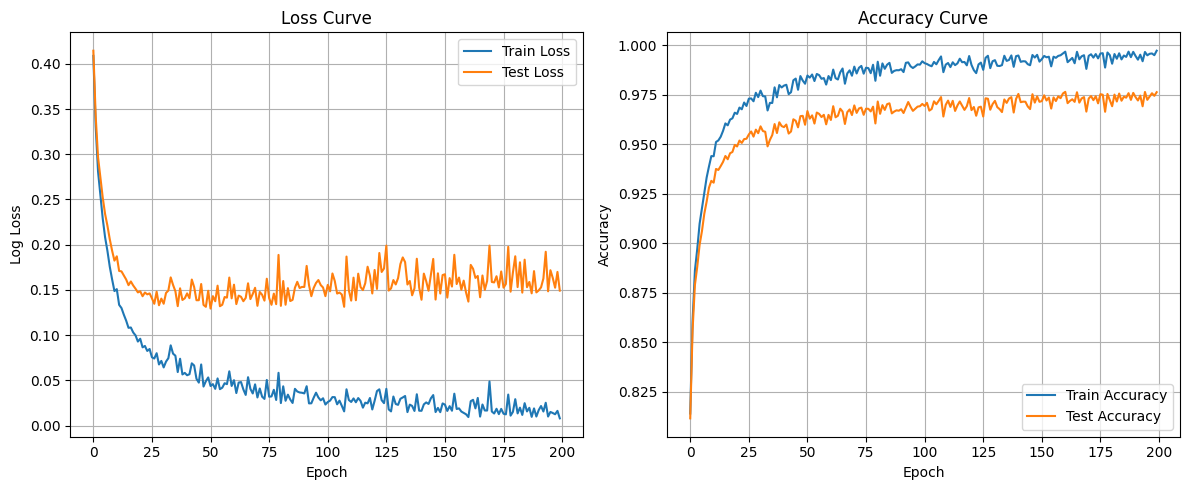

In [27]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import log_loss, accuracy_score
import matplotlib.pyplot as plt
import numpy as np

# Initialize model for manual training
mlp_model = MLPClassifier(
    hidden_layer_sizes=(256, 128, 64),
    activation='relu',
    solver='adam',
    alpha=1e-4,
    max_iter=1,              # One iteration per epoch
    warm_start=True,         # So training continues
    random_state=42
)

# Lists to track metrics
train_losses, test_losses = [], []
train_accuracies, test_accuracies = [],[]

# Get classes for partial_fit
classes = np.unique(y_train)

# Train for 100 epochs manually
for epoch in range(200):
    mlp_model.partial_fit(X_train, y_train, classes=classes)

    # Predictions
    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)

    y_train_proba = mlp_model.predict_proba(X_train)
    y_test_proba = mlp_model.predict_proba(X_test)

    # Metrics
    train_losses.append(log_loss(y_train, y_train_proba))
    test_losses.append(log_loss(y_test, y_test_proba))

    train_accuracies.append(accuracy_score(y_train, y_train_pred))
    test_accuracies.append(accuracy_score(y_test, y_test_pred))

# Plot: Loss Curves
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label="Train Loss")
plt.plot(test_losses, label="Test Loss")
plt.xlabel("Epoch")
plt.ylabel("Log Loss")
plt.title("Loss Curve")
plt.legend()
plt.grid()

# Plot: Accuracy Curves
plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label="Train Accuracy")
plt.plot(test_accuracies, label="Test Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Accuracy Curve")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


✅ Final Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.98     18122
           1       0.97      0.98      0.98     18123

    accuracy                           0.98     36245
   macro avg       0.98      0.98      0.98     36245
weighted avg       0.98      0.98      0.98     36245

✅ Final ROC-AUC Score: 0.9943


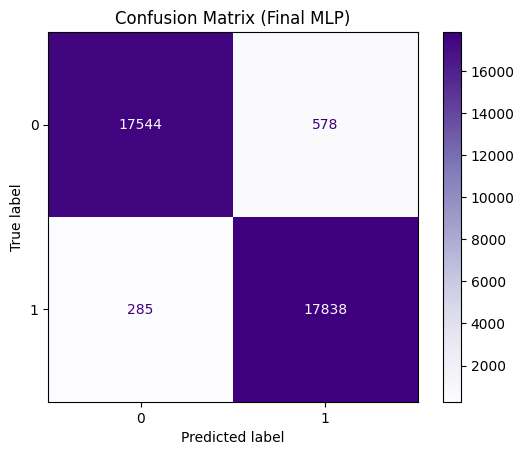

In [28]:
from sklearn.metrics import classification_report, roc_auc_score, ConfusionMatrixDisplay

# Final predictions
y_pred_mlp = mlp_model.predict(X_test)
y_proba_mlp = mlp_model.predict_proba(X_test)[:, 1]

# ✅ Classification Report
print("✅ Final Classification Report:")
print(classification_report(y_test, y_pred_mlp))

# ✅ ROC-AUC Score
roc_auc = roc_auc_score(y_test, y_proba_mlp)
print(f"✅ Final ROC-AUC Score: {roc_auc:.4f}")

# ✅ Confusion Matrix Plot
ConfusionMatrixDisplay.from_estimator(mlp_model, X_test, y_test, cmap="Purples")
plt.title("Confusion Matrix (Final MLP)")
plt.grid(False)
plt.show()


In [29]:
y_pred_mlp = mlp_model.predict(X_test)
y_proba_mlp = mlp_model.predict_proba(X_test)[:, 1]


In [30]:
from sklearn.metrics import classification_report

print("✅ MLP Classification Report:")
print(classification_report(y_test, y_pred_mlp))


✅ MLP Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.98     18122
           1       0.97      0.98      0.98     18123

    accuracy                           0.98     36245
   macro avg       0.98      0.98      0.98     36245
weighted avg       0.98      0.98      0.98     36245



In [31]:
from sklearn.metrics import roc_auc_score

roc_auc = roc_auc_score(y_test, y_proba_mlp)
print(f"✅ ROC-AUC Score: {roc_auc:.4f}")


✅ ROC-AUC Score: 0.9943


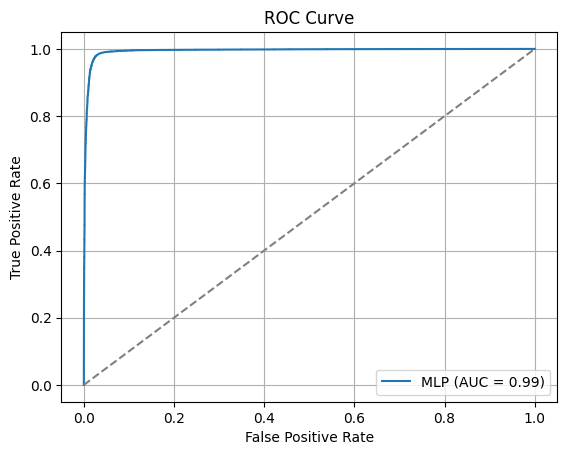

In [33]:
from sklearn.metrics import roc_curve

fpr, tpr, _ = roc_curve(y_test, y_proba_mlp)
plt.figure()
plt.plot(fpr, tpr, label=f"MLP (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()


Want to explain why your MLP trusts certain features?

🔷 1. Precision-Recall (PR) Curve

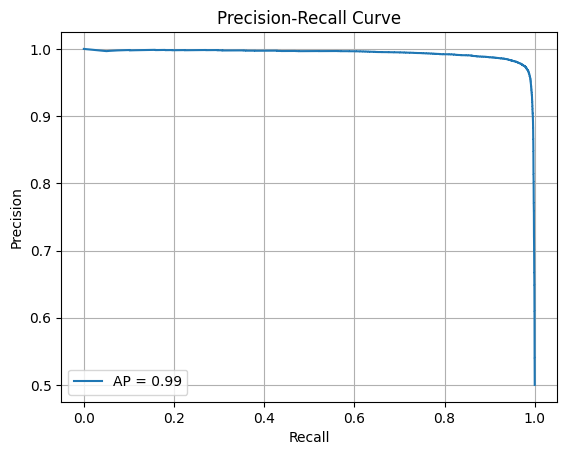

In [34]:
from sklearn.metrics import precision_recall_curve, average_precision_score

precision, recall, _ = precision_recall_curve(y_test, y_proba_mlp)
ap = average_precision_score(y_test, y_proba_mlp)

plt.plot(recall, precision, label=f"AP = {ap:.2f}")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.grid(True)
plt.legend()
plt.show()


In [105]:
from sklearn.metrics import log_loss

ll = log_loss(y_test, y_proba_mlp)
print(f"🔍 Log Loss: {ll:.4f}")


🔍 Log Loss: 0.1233


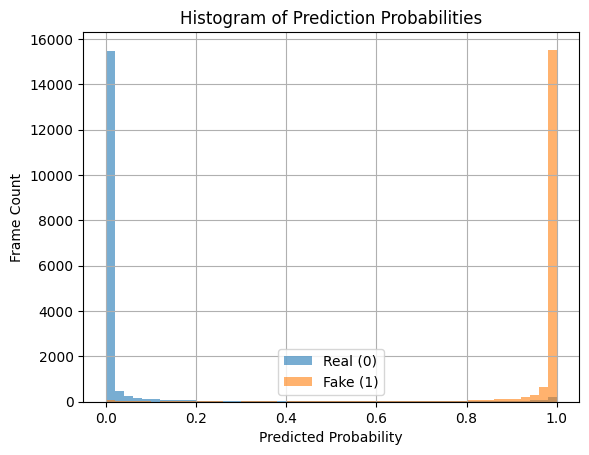

In [106]:
plt.hist(y_proba_mlp[y_test == 0], bins=50, alpha=0.6, label="Real (0)")
plt.hist(y_proba_mlp[y_test == 1], bins=50, alpha=0.6, label="Fake (1)")
plt.xlabel("Predicted Probability")
plt.ylabel("Frame Count")
plt.title("Histogram of Prediction Probabilities")
plt.legend()
plt.grid(True)
plt.show()


🔷 4. Cumulative Gains or Lift Curve (Optional for business-oriented metrics)
Useful in fraud or anomaly detection. Shows how much better your model performs than random guessing.

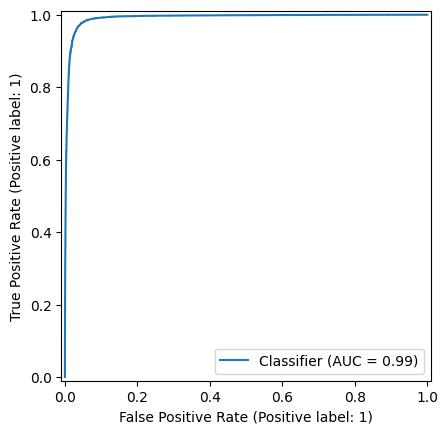

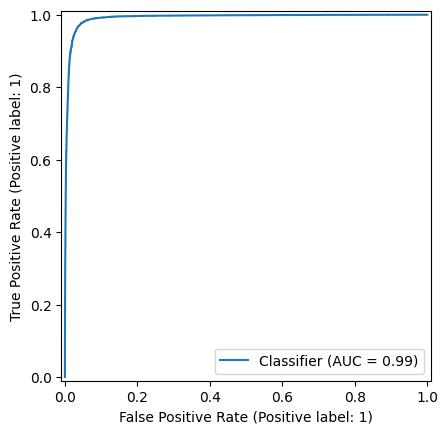

In [107]:
from sklearn.metrics import RocCurveDisplay

disp = RocCurveDisplay.from_predictions(y_test, y_proba_mlp)
disp.plot()


In [109]:
import pandas as pd
from sklearn.metrics import accuracy_score, f1_score

summary = {
    "Accuracy": [accuracy_score(y_test, y_pred_mlp)],
    "F1 Score": [f1_score(y_test, y_pred_mlp)],
    "ROC-AUC": [roc_auc_score(y_test, y_proba_mlp)],
    "Log Loss": [log_loss(y_test, y_proba_mlp)]
}

pd.DataFrame(summary).T.rename(columns={0: "MLP"}).round(4)


,MLP
Accuracy,0.9653
F1 Score,0.9657
ROC-AUC,0.9919
Log Loss,0.1233


In [39]:
import matplotlib.pyplot as plt
import numpy as np

def plot_coefficients(mlp_model):
    for i, coef in enumerate(mlp_model.coefs_):
        plt.figure(figsize=(6, 4))
        plt.imshow(coef, aspect='auto', cmap='seismic')
        plt.colorbar()
        plt.title(f'Coefficient Map: Layer {i} (Input→Hidden)' if i==0 else f'Hidden Layer {i}')
        plt.xlabel('Neurons in Next Layer')
        plt.ylabel('Features/Neurons in Current Layer')
        plt.show()

def plot_saliency_like_feature_importance(mlp_model, feature_names=None):
    input_weights = mlp_model.coefs_[0]  # Input layer weights
    saliency = np.mean(np.abs(input_weights), axis=1)  # Mean absolute weight per feature

    plt.figure(figsize=(10, 4))
    plt.bar(range(len(saliency)), saliency, color='tomato')
    if feature_names:
        plt.xticks(range(len(feature_names)), feature_names, rotation=90)
    plt.title('Feature Importance (Saliency Approximation)')
    plt.xlabel('Feature Index')
    plt.ylabel('Mean Absolute Weight')
    plt.grid()
    plt.show()

def plot_colored_feature_map(mlp_model):
    input_weights = mlp_model.coefs_[0]  # Input layer weights
    plt.figure(figsize=(8, 3))
    plt.imshow(input_weights.T, aspect='auto', cmap='jet')
    plt.colorbar()
    plt.title("Colored Feature Heatmap (Input Layer Weights)")
    plt.xlabel("Features")
    plt.ylabel("Neurons in First Hidden Layer")
    plt.show()


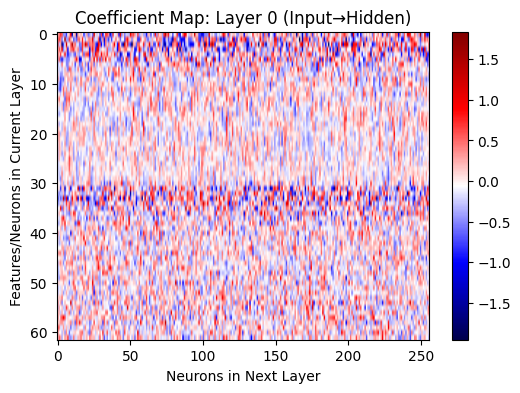

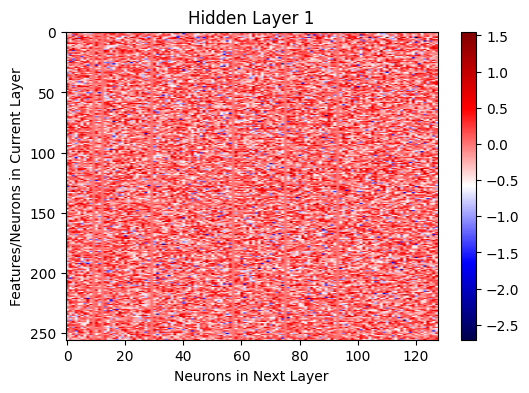

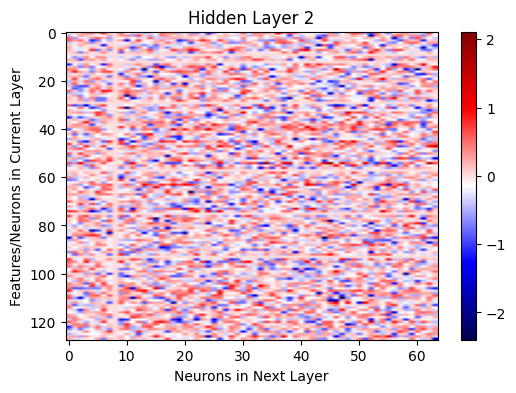

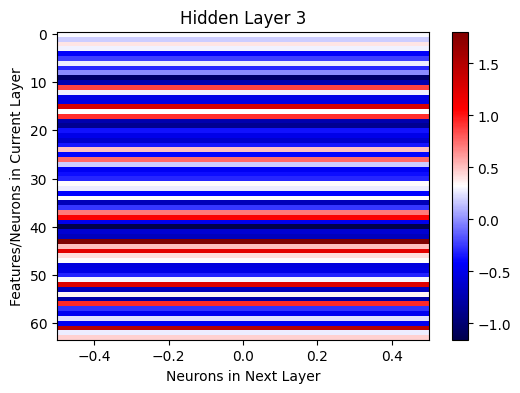

In [41]:
plot_coefficients(mlp_model)

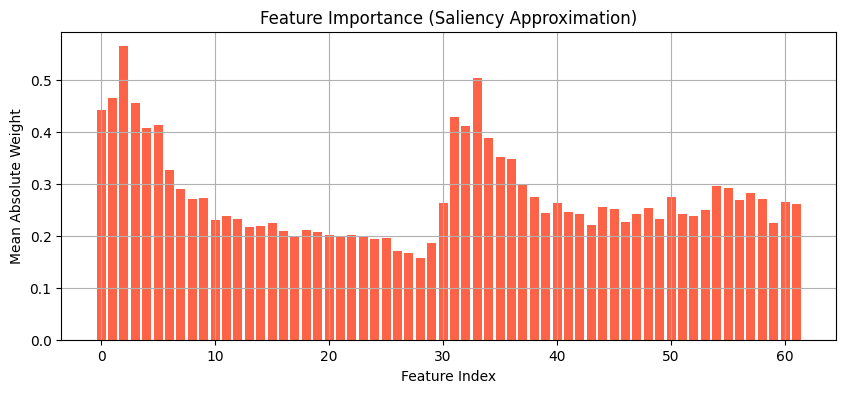

In [42]:

plot_saliency_like_feature_importance(mlp_model)


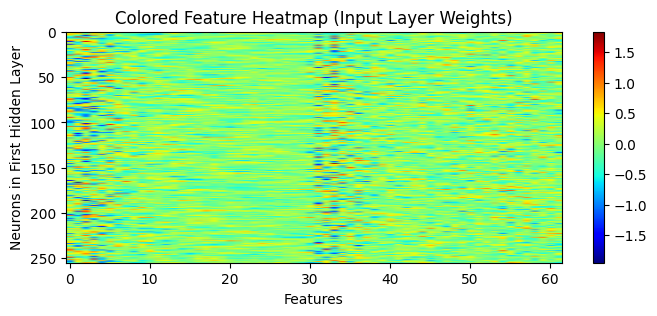

In [43]:
plot_colored_feature_map(mlp_model)

Kernal PCA


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
from sklearn.decomposition import KernelPCA
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.utils import resample
import matplotlib.pyplot as plt

In [3]:

file_path ='/content/drive/My Drive/8.hybrid_csvs_CrossDomain/celebDF_hybrid_fused_features.csv'
df = pd.read_csv(file_path)



In [4]:
df = df.dropna()

# ✅ Step 2: Separate Features and Labels
X = df.drop('label', axis=1).values   # Replace 'label' with your target column
y = df['label'].values


In [5]:

# ✅ 3. Subsample Data (to avoid RAM crash)
X_small, y_small = resample(X, y, n_samples=10000, random_state=42)



# ✅ 4. Scale Features
scaler = StandardScaler()
X_small_scaled = scaler.fit_transform(X_small)



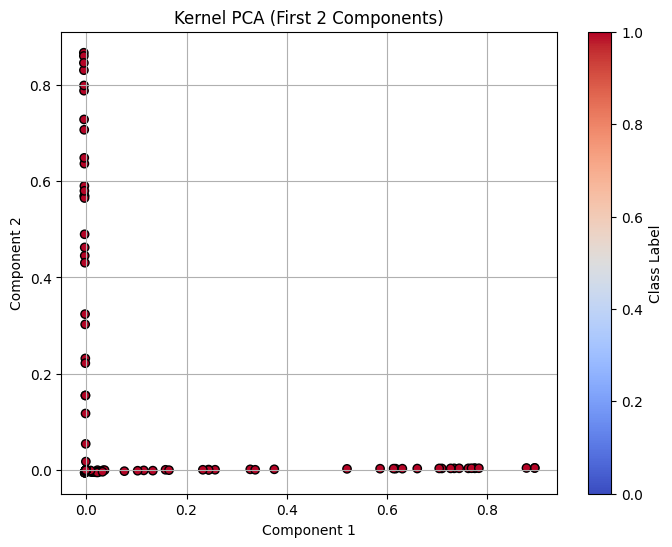

In [6]:

# ✅ 5. Kernel PCA
kpca = KernelPCA(n_components=10, kernel='rbf', gamma=15, random_state=42)
X_kpca = kpca.fit_transform(X_small_scaled)

# ✅ 6. Visualize First 2 Components
plt.figure(figsize=(8,6))
scatter = plt.scatter(X_kpca[:,0], X_kpca[:,1], c=y_small, cmap='coolwarm', edgecolors='k')
plt.colorbar(scatter, label='Class Label')
plt.title('Kernel PCA (First 2 Components)')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.grid(True)
plt.show()

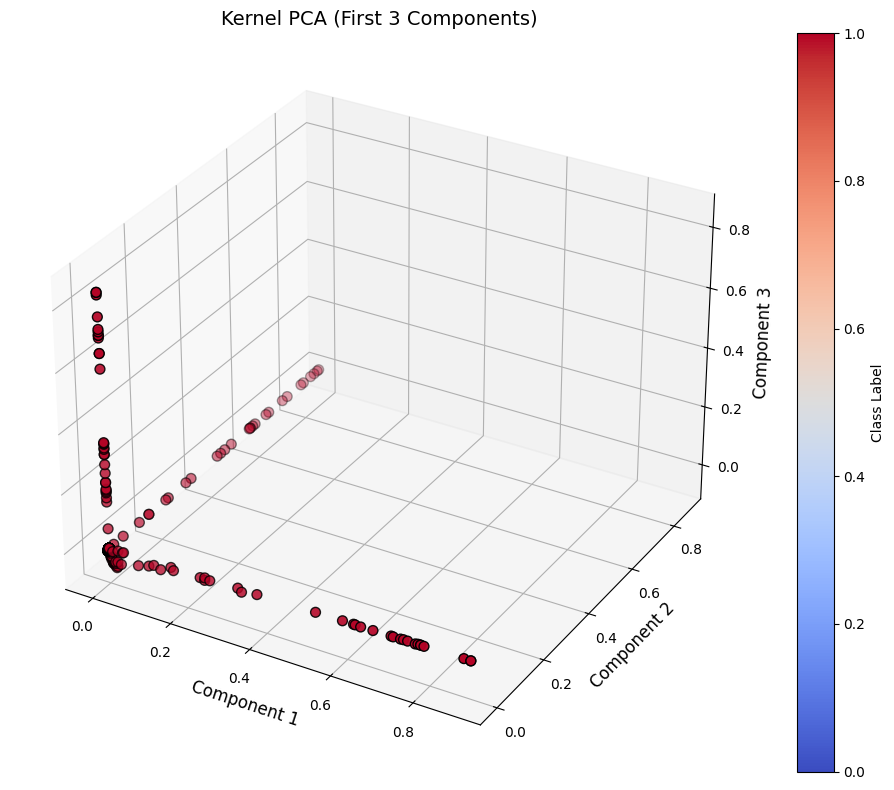

In [7]:

# ✅ 6. Visualize First 3 Components in 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    X_kpca[:, 0], X_kpca[:, 1], X_kpca[:, 2],
    c=y_small, cmap='coolwarm', edgecolor='k', s=50
)

ax.set_title('Kernel PCA (First 3 Components)', fontsize=14)
ax.set_xlabel('Component 1', fontsize=12)
ax.set_ylabel('Component 2', fontsize=12)
ax.set_zlabel('Component 3', fontsize=12)

fig.colorbar(scatter, ax=ax, label='Class Label')
plt.tight_layout()
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


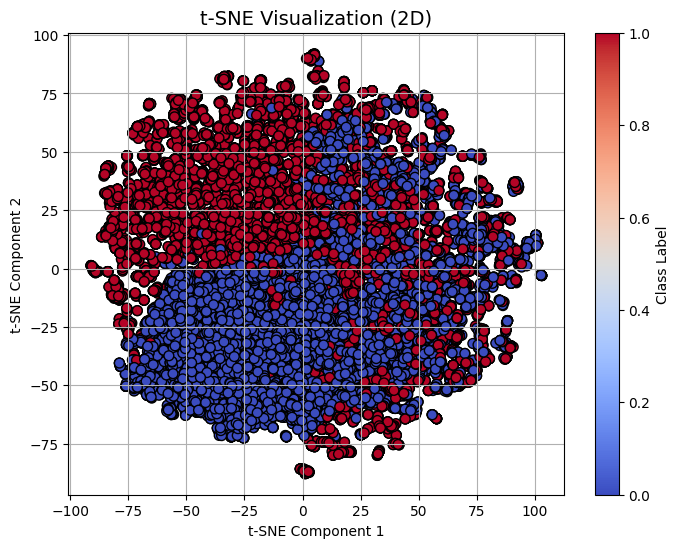

In [12]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# ✅ 1. t-SNE Initialization
tsne = TSNE(n_components=2, perplexity=30, learning_rate=200, n_iter=1000, random_state=42)

# ✅ 2. Fit and Transform
X_tsne = tsne.fit_transform(X_small_scaled)

# ✅ 3. Plotting
plt.figure(figsize=(8,6))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_small, cmap='coolwarm', edgecolors='k', s=50)
plt.colorbar(scatter, label='Class Label')
plt.title('t-SNE Visualization (2D)', fontsize=14)
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.grid(True)
plt.show()
